<h1 align="center">Sentence Transformers: Sentence Embedding, Sentence Similarity, Semantic Search and Clustering |Code</h1>

Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

Links de estudos:

* [semantic-similarity](https://github.com/abhinavthomas/semantic-similarity)

* [Sentence Transformers](https://www.youtube.com/watch?v=OlhNZg4gOvA)


# Sentence Embeddings

<font color="orange">É o nome coletivo para um conjunto de técnicas em processamento de linguagem natural (NLP) onde as sentenças são mapeadas para vetores de números reais .</font>

Casos de uso:

* Sentence Embedding

* Sentence Similarity

* Semantic Search

* Clustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Gerando Embeddings

In [ ]:
!pip install -U sentence-transformers

In [ ]:
#!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer, util

# Carregamos o Modelo pré-treinado ---> https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
model = SentenceTransformer('all-MiniLM-L6-v2')


In [ ]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [ ]:
sentences = ['This framework generates embeddings for each input sentence',
             'Sentences are passed as a list of string.']


embeddings = model.encode(sentences)

In [ ]:
embeddings.shape

(2, 384)

In [ ]:
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")


# Cosine-Similarity

In [ ]:
emb1 = model.encode("I am eating Apple")
emb2 = model.encode("I like fruits")

cos_sim = util.cos_sim(emb1, emb2)
print("Cosine-Similarity:", cos_sim)

Cosine-Similarity: tensor([[0.5398]])


## Calcula a `similaridade de cosseno` entre todos os pares

<font color="orange">Repara que a seguir comparamos as similaridade entre cada sentença. </font>

Por exemplo:

$[1.0000,  0.7553, -0.1050,  0.2474, -0.0704, -0.0333,  0.1707,  0.0476,
          0.0630]$

Se compara assim: 1_senteça-1_sentença = 1.0000 | 1_senteça-2_sentença = 0.7553 | 1_senteça-3_sentença = -0.1050 | 1_senteça-4_sentença | ...            

In [ ]:
# Compute cosine similarity between all pairs
sentences = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.'
          ]

# Codificamos (Encode) todas as sentences
embeddings = model.encode(sentences)

# Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)

cos_sim

tensor([[ 1.0000,  0.7553, -0.1050,  0.2474, -0.0704, -0.0333,  0.1707,  0.0476,
          0.0630],
        [ 0.7553,  1.0000, -0.0610,  0.1442, -0.0809, -0.0216,  0.1157,  0.0362,
          0.0216],
        [-0.1050, -0.0610,  1.0000, -0.1088,  0.0217, -0.0413, -0.0928,  0.0231,
          0.0247],
        [ 0.2474,  0.1442, -0.1088,  1.0000, -0.0348,  0.0362,  0.7369,  0.0821,
          0.1389],
        [-0.0704, -0.0809,  0.0217, -0.0348,  1.0000, -0.1654, -0.0592,  0.1961,
          0.2564],
        [-0.0333, -0.0216, -0.0413,  0.0362, -0.1654,  1.0000,  0.0769, -0.0380,
         -0.0895],
        [ 0.1707,  0.1157, -0.0928,  0.7369, -0.0592,  0.0769,  1.0000,  0.0495,
          0.1191],
        [ 0.0476,  0.0362,  0.0231,  0.0821,  0.1961, -0.0380,  0.0495,  1.0000,
          0.6433],
        [ 0.0630,  0.0216,  0.0247,  0.1389,  0.2564, -0.0895,  0.1191,  0.6433,
          1.0000]])

In [ ]:
# Adicionamos todos os pares a uma lista com sua pontuação de similaridade de cosseno
all_sentence_combinations = []

for i in range(len(cos_sim)-1):
    for j in range(i + 1, len(cos_sim)):
        all_sentence_combinations.append((cos_sim[i][j], i, j))
all_sentence_combinations       


[(tensor(0.7553), 0, 1),
 (tensor(-0.1050), 0, 2),
 (tensor(0.2474), 0, 3),
 (tensor(-0.0704), 0, 4),
 (tensor(-0.0333), 0, 5),
 (tensor(0.1707), 0, 6),
 (tensor(0.0476), 0, 7),
 (tensor(0.0630), 0, 8),
 (tensor(-0.0610), 1, 2),
 (tensor(0.1442), 1, 3),
 (tensor(-0.0809), 1, 4),
 (tensor(-0.0216), 1, 5),
 (tensor(0.1157), 1, 6),
 (tensor(0.0362), 1, 7),
 (tensor(0.0216), 1, 8),
 (tensor(-0.1088), 2, 3),
 (tensor(0.0217), 2, 4),
 (tensor(-0.0413), 2, 5),
 (tensor(-0.0928), 2, 6),
 (tensor(0.0231), 2, 7),
 (tensor(0.0247), 2, 8),
 (tensor(-0.0348), 3, 4),
 (tensor(0.0362), 3, 5),
 (tensor(0.7369), 3, 6),
 (tensor(0.0821), 3, 7),
 (tensor(0.1389), 3, 8),
 (tensor(-0.1654), 4, 5),
 (tensor(-0.0592), 4, 6),
 (tensor(0.1961), 4, 7),
 (tensor(0.2564), 4, 8),
 (tensor(0.0769), 5, 6),
 (tensor(-0.0380), 5, 7),
 (tensor(-0.0895), 5, 8),
 (tensor(0.0495), 6, 7),
 (tensor(0.1191), 6, 8),
 (tensor(0.6433), 7, 8)]

In [ ]:
# Lista de classificação pela maior pontuação de similaridade de cosseno
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

print("Os 5 pares mais semelhantes: ")
for score, i, j in all_sentence_combinations[0: 5]:
    print("{} \t {} \t {:.4f}".format(sentences[i], sentences[j], cos_sim[i][j]))
    

Os 5 pares mais semelhantes: 
A man is eating food. 	 A man is eating a piece of bread. 	 0.7553
A man is riding a horse. 	 A man is riding a white horse on an enclosed ground. 	 0.7369
A monkey is playing drums. 	 Someone in a gorilla costume is playing a set of drums. 	 0.6433
A woman is playing violin. 	 Someone in a gorilla costume is playing a set of drums. 	 0.2564
A man is eating food. 	 A man is riding a horse. 	 0.2474


# Pesquisa Semântica

<font color="orange">A pesquisa semântica denota a pesquisa com significado, diferente da `pesquisa lexical`, na qual o mecanismo de pesquisa procura correspondências literais das palavras de consulta ou variantes delas, sem entender o significado geral da consulta.</font>



Entãop, a `pesquisa semântica` descreve a tentativa de um mecanismo de pesquisa de gerar os resultados SERP (`Search Engine Results Page`) mais precisos possíveis, com base na intenção do pesquisador, no contexto da consulta e na relação entre as palavras . Isso é importante porque: As pessoas dizem coisas e questionam coisas de diferentes maneiras, idiomas e tons.

In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('clips/mfaq') # Modelo pré-treinado do HuggingFace --> https://huggingface.co/clips/mfaq

<font color="orange">`MFAQ` é um modelo de recuperação de FAQ multilíngue treinado no conjunto de dados MFAQ , que classifica as respostas dos candidatos de acordo com uma determinada pergunta.</font>


<font color="orange">Você pode usar o MFAQ com `Transformers` de sentença ou diretamente com um modelo HuggingFace. Em ambos os casos, as perguntas precisam ser precedidas por `<Q>`, e as respostas por `<A>`.</font>

In [ ]:
question = "<Q>How many models can I host on HuggingFace?"

answer_1 = "<A>All plans come with unlimited private models and datasets."
answer_2 = "<A>AutoNLP is an automatic way to train and deploy state-of-the-art NLP models, seamlessly integrated with the Hugging Face ecosystem."
answer_3 = "<A>Based on how much training data and model variants are created, we send you a compute cost and payment link - as low as $10 per job."


query_embedding = model.encode(question)
corpus_embeddings = model.encode([answer_1, answer_2, answer_3])


print(util.semantic_search(query_embedding, corpus_embeddings))

[[{'corpus_id': 0, 'score': 0.5646326541900635}, {'corpus_id': 2, 'score': 0.5142340660095215}, {'corpus_id': 1, 'score': 0.47300389409065247}]]


<font color="orange">Outro exemplo a seguir seria obter a resposta em si. Por isso devemos ter bem claro os conceitos de que uma coisa é a pesquisa semântica e outra coisa é encontrar a resposta dentro do texto mesmo (o qual é a resposta mesmo). Vejamos o exemplo a seguir:</font>

In [ ]:
# Ver o seguinte Link do HuggingFace ---> https://huggingface.co/tasks/question-answering

from transformers import pipeline


qa_model = pipeline("question-answering")

question = "Where do I live?"
context = "My name is Merve and I live in İstanbul."


No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
qa_model(question = question, context = context)


{'score': 0.9538118243217468, 'start': 31, 'end': 39, 'answer': 'İstanbul'}

<font color="pink">A pesquisa semântica me ajuda a restringuir muitos docuemtnso e não ter que procurar a resposta em todos os documentos. Vejamos o uso deste `pipeline` aplicado a nosso exemplo anterior:</font>

In [ ]:
from transformers import pipeline


qa_model = pipeline("question-answering")


question = "How many models can I host on HuggingFace?"
context = "All plans come with unlimited private models and datasets."


qa_model(question = question, context = context)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.7017179131507874, 'start': 20, 'end': 29, 'answer': 'unlimited'}

# Clustering

In [105]:
from sklearn.cluster import KMeans
import numpy as np


embedder = SentenceTransformer('all-MiniLM-L6-v2')


# Corpus com frases de exemplo
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'Horse is eating grass.',
          'A man is eating pasta.',
          'A Woman is eating Biryani.',
          'The girl is carrying a baby.',
          'The baby is carried by the woman',
          'A man is riding a horse.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.',
          'A cheetah is running behind its prey.',
          'A cheetah chases prey on across a field.',
          'The cheetah is chasing a man who is riding the horse.',
          'man and women with their baby are watching cheetah in zoo'
          ]


corpus_embeddings = embedder.encode(corpus)

# Normalize as incorporações para o comprimento da unidade
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)
 

In [106]:
len(corpus_embeddings[0])


384

In [107]:
len(corpus_embeddings[1])

384

In [ ]:
!pip install kneed

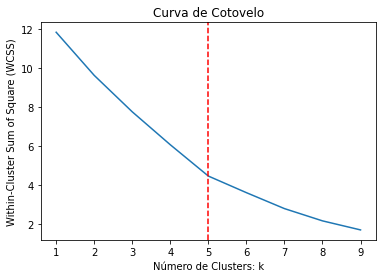

In [108]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from kneed import KneeLocator

# Seus dados
X = corpus_embeddings

# Lista para armazenar valores de WCSS para cada k
wcss = []

# Iterar para diferentes valores de k
for k in range(1, 10):
    # Ajustar o modelo KMeans com k clusters
    kmeans = KMeans(n_clusters=k,  init='k-means++', max_iter=300, tol=1e-4, n_init=30, algorithm='elkan', random_state=0)
    kmeans.fit(X)
    # Adicionar o WCSS ao final da lista wcss
    wcss.append(kmeans.inertia_)

# Encontrar o número ideal de clusters usando o KneeLocator
kneedle = KneeLocator(range(1, 10), wcss, curve='convex', direction='decreasing')
num_clusters = kneedle.elbow

# Plotar a curva de cotovelo com a linha vertical no número ideal de clusters
plt.plot(range(1, 10), wcss)
plt.axvline(x=num_clusters, color='red', linestyle='--')
plt.title('Curva de Cotovelo')
plt.xlabel('Número de Clusters: k')
plt.ylabel('Within-Cluster Sum of Square (WCSS)')
plt.show()

In [109]:
# source: https://stackoverflow.com/questions/55619176/how-to-cluster-similar-sentences-using-bert

clustering_model = KMeans(n_clusters=5)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_


print(cluster_assignment)


[3 3 1 3 3 2 2 1 1 4 4 0 0 0 0]


In [110]:
from sklearn.metrics import silhouette_score
'''
Silhueta é uma métrica de similaridade de cada instância em relação a seu próprio cluster em comparação com outros clusters.
Vária de [-1, 1]. 1 --> Instâncias bem agrupadas & -1 --> Agrupamentos fracos.
Para Clusterização não-supervisionada.
'''

silhouette_score = silhouette_score(X, cluster_assignment)

print("Score Silhueta:", silhouette_score)

Score Silhueta: 0.27678642


In [111]:
clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])
    
clustered_sentences


{3: ['A man is eating food.',
  'A man is eating a piece of bread.',
  'A man is eating pasta.',
  'A Woman is eating Biryani.'],
 1: ['Horse is eating grass.',
  'A man is riding a horse.',
  'A man is riding a white horse on an enclosed ground.'],
 2: ['The girl is carrying a baby.', 'The baby is carried by the woman'],
 4: ['A monkey is playing drums.',
  'Someone in a gorilla costume is playing a set of drums.'],
 0: ['A cheetah is running behind its prey.',
  'A cheetah chases prey on across a field.',
  'The cheetah is chasing a man who is riding the horse.',
  'man and women with their baby are watching cheetah in zoo']}

In [ ]:
!pip install umap-learn

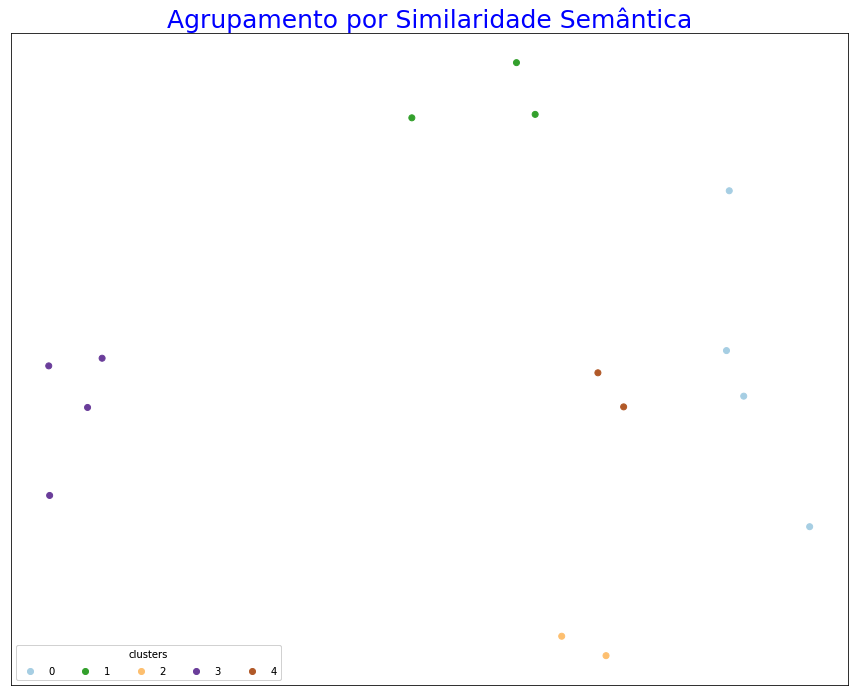

In [117]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline


import umap

# Aplico UMAP a meu Dataset
umap_object = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.001, metric='euclidean', learning_rate=0.001, repulsion_strength=1, random_state=0)
umap_embeddings = umap_object.fit_transform(corpus_embeddings)

fig, ax = plt.subplots(figsize=(15, 12))
scatter = ax.scatter(umap_embeddings[:,0], umap_embeddings[:,1], c = cluster_assignment, cmap="Paired") 

# Legenda com as cores únicas de nossos clusters
legend1 = ax.legend(*scatter.legend_elements(num=4), ncol=10, loc="lower left", title="clusters")
ax.add_artist(legend1)
ax.set_xticks([])
ax.set_yticks([])

plt.title("Agrupamento por Similaridade Semântica", fontsize=25, color="blue")
plt.show()